<a href="https://colab.research.google.com/github/shriver42/ESAA/blob/%ED%95%84%EC%82%AC-%EA%B3%BC%EC%A0%9C/0405_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[01] 분류
- 지도 학습 : 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
- 분류는 지도학습의 대표적인 방식으로 레이블값(결정 값, 클래스 값)을 통해 모델 생성
- 분류를 구현할 수 있는 알고리즘:
 - 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
 - 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
 - 데이터 균일도에 따른 규칙 기반의 결정 트리
 - 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 백터 머신
 - 근접 거리를 기준으로 하는 최소 근접 알고리즘
 - 심층 연결 기반의 신경망
 - 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블
- 앙상블은 정형 데이터의 예측 분석 영역에 높은 성능으로 각광받고 있음
 - 서로 같은/다른 알고리즘을 단순 결합
 - 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉨</br>
   -배깅 : 랜덤 포레스트</br>
   -부스팅 : 그래디언트 부스팅-> XgBoost,LightGBM
 - 스태킹 : 앙상블의 앙상블
- 앙상블의 기본 알고리즘으로는 주로 결정 트리를 사용함

[02] 결정 트리
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만든다 : if/else를 이용한다
- 트리의 깊이가 깊어질수록 방식이 복잡해진다는 의미이며, 예측 성능이 저하될 가능성이 높다
- 높은 예측 정확도를 위해서는 데이터 분류시, 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 필요하다
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만들어야 한다.
- 정보 균일도를 측정하는 방법 : 엔트로피를 이용한 정보이득 지수 / 지니 계수
 - 엔트로피 : 주어진 데이터의 혼잡도.</br> 즉, 다른 값이 섞여 있으면 엔트로피가 높고 같은 값이 섞이면 엔트로피가 낮아짐.</br> 정보지수는 (1-엔트로피 지수)이다.
 - 지니 계수 : 지니 계쑤가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다

[02 - 2] 결정 트리 모델의 특징
- 정보의 '균일도'를 기반으로 하고 있어서 직관적임. 사전 가공 영향이 크지 않다는 장점 존재
- 과적합으로 정확도가 떨어질 수 있는 단점 존재
- 트리 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움이 된다

[02-3] 결정 트리 파라미터
- DecisicionTreeRegression : 회귀를 위한 클래스
- *DecisionTreeClassifier* : 분류를 위한 클래스
 - min_sample_split : 노드를 분할하기 위한 최소한 샘플 데이터 수로 과적합 제어. 작게 설정할 수록 노드 증가
 - min_samples_leaf : 말단 노드가 되기 위한 최소한 샘플 데이터 수. 과적합 제어 용도
 - max_features : 최적의 분하를 위해 고려할 최대 피처 개수 .</br> int 지정->대상 피처 개수, float -> 전체 중 대상 피처 퍼센트
 - max_depth : 트리의 최대 깊이 규정
 - max_leaf_nodes : 말단 노드의 최대 개수

[02-4] 결정 트리 모델의 시각화
- Graphviz 패키지 사용
- 자식 노드가 없는 노드는 리프 노드 : 최종 클래스 값이 결정되는 노드이다
- 자식 노드가 있는 노드는 브랜치 노드 : 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있다
- 시각화 해석:
 - 피처의 조건  : 자식 노드를 만들기 위한 규칙 조건
 - gini : 다음의 value=[]로 주어진 데이텉 분포에서의 지니 계수
 -samples : 현 규칙에 해당하는 데이터 건수
 - value =[] : 클래스 값 기반의 데이터 건수
- feature_importances_ 는 ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당된다

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,iris_data.target, test_size = 0.2 , random_state= 11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [47]:
#Grahpviz : export_graphiz() 이용
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,feature_names=iris_data.feature_names,impurity=True,filled=True)

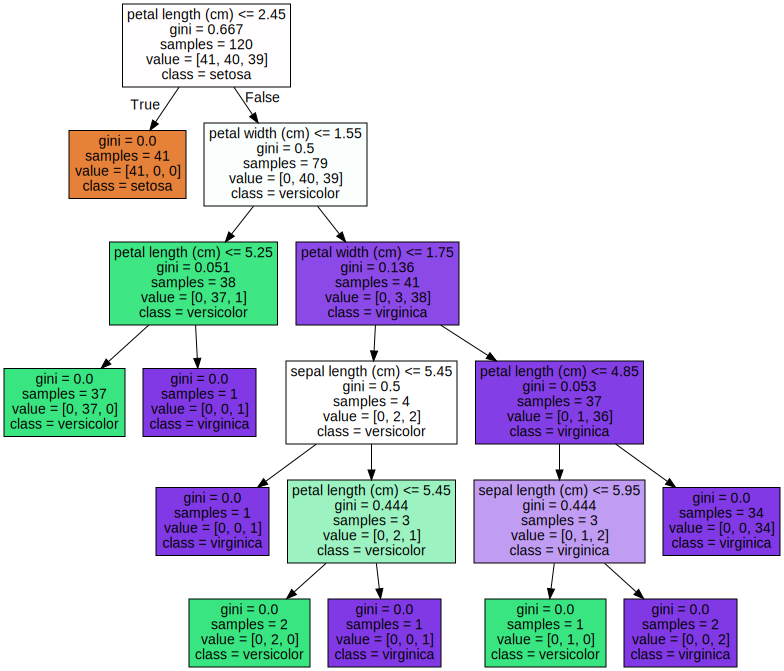

In [48]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 일겅서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

위의 시각화 해석: </br>
samples = 120 : 전체 데이터가 120개 이다</br>
value = [41,40,39] 는 Setosa,Versicolor, Virginica 가 각각 41,40,39 개로 구성되어있다</br>
지니 계수는 0.667</br>
petal length <= 2.45 규칙으로 자식 노드 생성</br>
class=setosa는 하위 노드를 가질 경우, setosa의 개수가 41개로 제일많음

Feature importance :|n[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

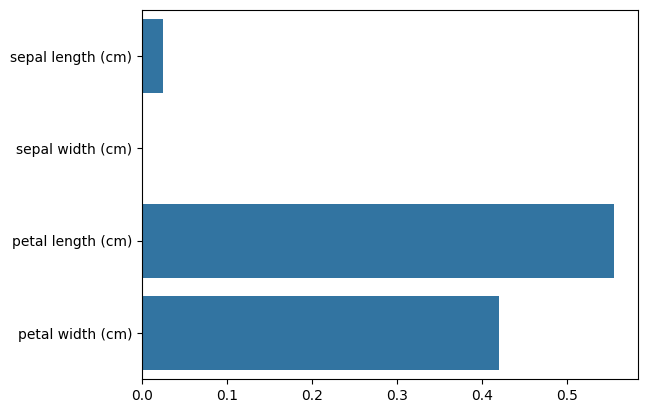

In [49]:
#feature_importances_ 속성을 이용해 피처별로 중요도를 막대그래프로 표현하기
import seaborn as sns
import numpy as np
%matplotlib inline

#feature imporptance 추출
print("Feature importance :|n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name,value))

#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

[02-5] 결정 트리 과적합(Overfitting)

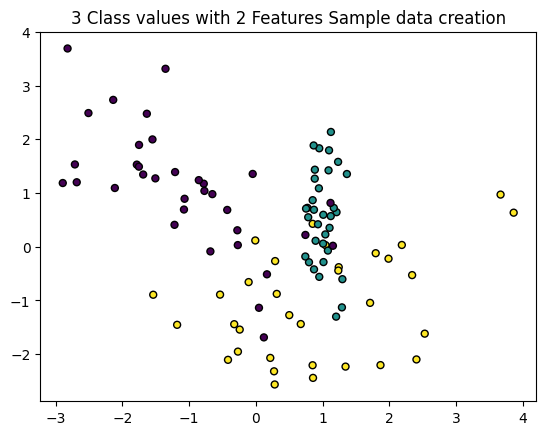

In [50]:
#임의의 데이터 세트 만들기 : make_classification()
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 분류 샘플 데이터를 생성.
X_features, y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,n_classes=3,n_clusters_per_class=1,random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels, s=25,edgecolor='k')

In [51]:
#visualize_boundary : 예측 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측, 분류하는지 보여줌
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

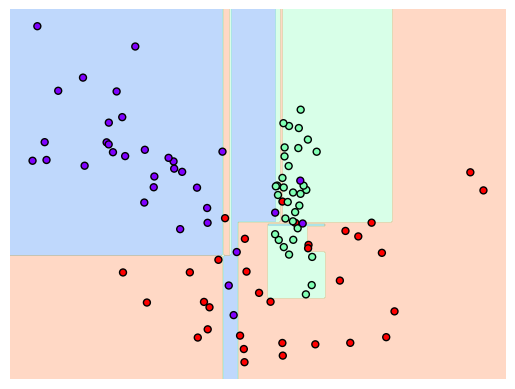

In [52]:
#X_features과 y_labels을 가지고 결정 트리 학습

from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

위와 같이 결정 기준 경계가 복잡해지면, 예측 정확도가 떨어지게 된다.

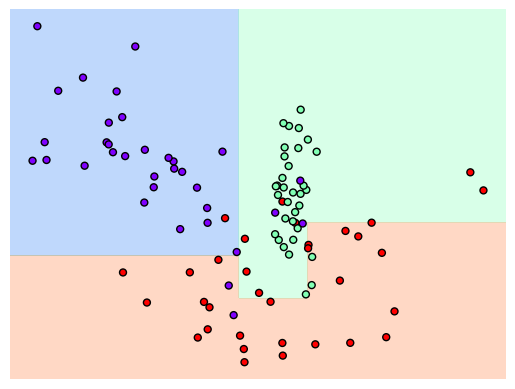

In [53]:
#min_samples_leaf = 6으로 고정하여 동일한 코드 실행
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf, X_features,y_labels)

위의 결과보다 이상치에 덜 반응하여 좀 더 일반화된 분류 규칙에 따라 분류가 되었다.

[02-6] 결정 트리 실습 - 사용자 행동 인식 데이터 세트


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./features.txt', sep='\s+', header=None,names=['column_index','column_name'])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [55]:
#중복된 피처명에 대해 구분한 뒤 데이터에 로드함
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [56]:
#중복된 피처명에 대해 새로운 피처명 부과
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df

In [57]:
#학습,테스트용 데이터 세트를 DataFrame에 로드
import pandas as pd

def get_human_datasets( ):
  #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv('./features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

  #중복된 피처명을 수정하는 get_new_feature_name_df()를 이용,신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  #학습 피터 데이터세트와 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('./X_train.txt',sep='\s+', names=feature_name)
  X_test = pd.read_csv('./X_test.txt', sep='\s+', names=feature_name)

  #학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('./y_train.txt',sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('./y_test.txt', sep='\s+', header=None, names=['action'])

  #로드된 학습/테스트용 DataFrame을 모두 변환
  return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = get_human_datasets()

In [58]:
print('## 학습 피처 데이터셋 info() ')
print(X_train.info())

## 학습 피처 데이터셋 info() 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [59]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [60]:
#동장 예측 분류 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정 트리 예측 정확도: {0:.4f}',format(accuracy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터: \n', dt_clf.get_params())

결정 트리 예측 정확도: {0:.4f} 0.8547675602307431
DecisionTreeClassifier 기본 하이퍼 파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [61]:
#결정 트리의 트리 깊이가 주는 예측 정확도 알아보기
#max_depth 값을 변화시키며 예측 성능 확인해보기

from sklearn.model_selection import GridSearchCV

params={
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf,param_grid = params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [62]:
#GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [63]:
max_depths = [6,8,10,12,16,20,24]
#max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth,random_state=156)
  dt_clf.fit(X_train,y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test,pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth,accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [64]:
#정확도 성능 튜닝하기
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24]
}

grid_cv = GridSearchCV(dt_clf,param_grid = params, scoring='accuracy',verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [65]:
#학습이 완료된 객체로 테스트 데이터 세트 예측하기
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8717


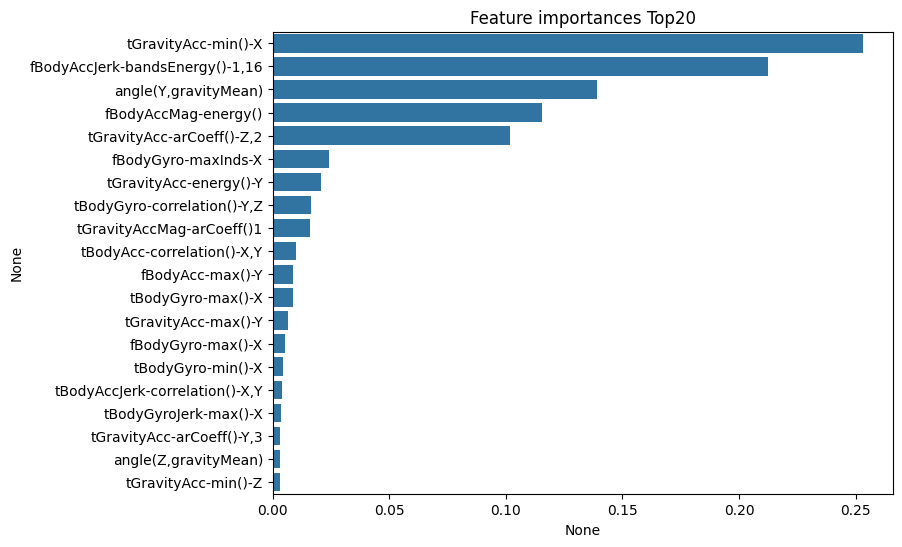

In [66]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
#Top  중요도로 정렬을 쉽게 하고, 시본(seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
#중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x = ftr_top20,y = ftr_top20.index)
plt.show()